# TẠO CÁC TẬP DỮ LIỆU TRAIN, TEST (SPLITS)

1. Yêu cầu chung: Tạo ra các splits, mỗi split tương ứng với một tập dữ liệu train - test
  + Bài học lý thuyết (để trả lời cho các câu hỏi như vì sao phải cần việc này, thực hiện việc này như thế nào):
    - https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation
    - https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/
    - https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/

  <IMG SRC = 'https://raw.githubusercontent.com/satishgunjal/images/master/KFold_Cross_Validation.png'>
2. Yêu cầu cụ thể:
- Input:
    + Thư mục cha chứa các thư mục con - mỗi thư mục con tương ứng với tên của từng hiệu xe (Honda, Suzuki, VinFast, Yamaha, Others). Ví dụ: https://drive.google.com/drive/u/1/folders/12WrC9APRzQX36cataTccBiN_Z5F2C0yD
    + Các ảnh được đặt tên theo quy ước: các tập tin ảnh theo quy ước https://colab.research.google.com/drive/1sZBm78OiTUOqbg5-Z2UOKlk3B37TAgd8
    + Số splits NumSplits - mặc định NumSplits=5 (tương đương 5-fold CV)
- Output:
    + File MotocycleDataset.csv - Tập tin chứa tất cả ảnh của dataset
      - Chương trình sẽ scan qua cây thư mục để tìm tất cả các ảnh (chỉ chọn các ảnh có định dạng + phần mở rộng là .jpg)
      - Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: ImageFullPath, CategoryID
            - ImageFullPath ở dạng <Thư mục Hiệu xe>/<Tên ảnh>. Ví dụ: Honda/2024123.Honda.1.jpg.
            - CategoryID là số nguyên thuộc [0..5] theo quy ước
              - 0: Others
              - 1: Honda
              - 2: Suzuki
              - 3: Yamaha
              - 4: VinFast     
    + File MotocycleDataset-Splits-[1..5]-[Train/Test].csv - Phân chia thành các splits, mỗi split gồm các ảnh được chia thành thành 2 tập Train - Test
      + Chương trình sẽ đọc dữ liệu từ file  MotocycleDataset.csv, sau đó với mỗi hiệu xe, chia ngẫu nhiên thành 5 tập dữ liệu. Lưu ý là phải chia theo hiệu xe, để đảm bảo dữ liệu Train/Test có dữ liệu của các hiệu xe.
      + Từ 5 tập dữ liệu chia ngẫu nhiên theo các hiệu xe Xij (i là thứ tự tập dữ liệu, j là CategoryID), gom lại thành 5 tập dữ liệu lớn hơn Xi, sao cho mỗi tập dữ liệu này chứa đủ dữ liệu của tất cả các hiệu xe. Tức là Xi = Union(Xij)       
      + Từ 5 tập dữ liệu Xi này (tương ứng với FOLDi ở trong hình vẽ trên), tạo ra 5 splits Split-i
      + Với mỗi bộ dữ liệu Split-i, ghi xuống thành 2 tập tin tương ứng với Train, Test. Ví dụ Split-1 thì ghi thành tập tin  MotocycleDataset-Splits-1-Train.csv và MotocycleDataset-Splits-1-Test.csv. Tập Train gồm 4 bộ, Test gồm bộ còn lại. Ví dụ,
          + Split-1: tập Train sẽ gồm X2, X3, X4, X5, tập Test là X1
          + Split-5: tập Train sẽ gồm X1, X2, X3, X4, tập Test là X5
      + Mỗi dòng sẽ có các thông tin cách nhau bằng dấu phẩy, theo quy ước: ImageFullPath, CategoryID
- Lưu ý:
  - Nên viết thêm các cell
    - Hiển thị danh sách các tên tập tin ảnh trong từng Split-Train/Test,
    - Thống kê các ảnh cho từng CategoryID trong mỗi Split-Train/Test
  - Cần có chú thích
3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline: 17:00 - 10/06/2024

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

#LỚP: CS114.O21

---


#Danh sách thành viên:


1.   22521266 : Trần Giang Sử
2.   22521332 : Nguyễn Dương Quốc Thắng
3.   22521402 : Đinh Quốc Thịnh


---



#NGÀY CẬP NHẬT: 8/6/2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv

# Đường dẫn đến thư mục Public
public_folder_path = '/content/drive/MyDrive/Public'

# Danh sách các thư mục con và category tương ứng
folders = {
    'Honda': 1,
    'Suzuki': 2,
    'Yamaha': 3,
    'VinFast': 4,
    'Others': 0
}

# Tạo một danh sách để lưu thông tin của các ảnh
image_info = []

# Duyệt qua từng thư mục con và truy xuất thông tin ảnh
for folder_name, category in folders.items():
    folder_path = os.path.join(public_folder_path, folder_name)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg') or filename.endswith('.jpg'):
            image_info.append([f'{folder_name}/{filename}', category])

# Xuất thông tin ra file CSV
csv_file_path = '/content/drive/MyDrive/MotocycleDataset.csv'
with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Viết tiêu đề cho file CSV
    writer.writerow(['ImageFullPath', 'Category'])
    # Viết thông tin của mỗi ảnh vào file CSV
    for info in image_info:
        writer.writerow(info)

print(f'Đã xuất thông tin ảnh thành công vào file CSV tại: {csv_file_path}')



Đã xuất thông tin ảnh thành công vào file CSV tại: /content/drive/MyDrive/MotocycleDataset.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
import os

# Đường dẫn đến thư mục chính và tên thư mục mới
main_drive_path = '/content/drive/MyDrive'
new_folder_name = 'MotorcycleDatasetSplits'
new_folder_path = os.path.join(main_drive_path, new_folder_name)

# Tạo thư mục mới nếu nó chưa tồn tại
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)

# Đọc dữ liệu từ file CSV
df = pd.read_csv(os.path.join(main_drive_path, 'MotocycleDataset.csv'))


# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/MotocycleDataset.csv')

# Tạo đối tượng StratifiedKFold để chia dữ liệu
#n = 5 (5 phần)
#shuffle = True : xáo trộn dữ liệu trước khi chia
#chọn random_state để việc chia dữ liệu nhất quán (đều)
#sử dụng stratifiedKFold với n = 5 sẽ chia dữ liệu thành 5 phần
#trong đó 4 phần sẽ sử dụng cho train và 1 phần cho test
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Chia dữ liệu và lưu vào các file CSV
for fold, (train_index, test_index) in enumerate(skf.split(df, df['Category']), start=1):
#số fold = 5 (start 1-->5) (số lượng fold = số cate)
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    # Lưu dữ liệu Train và Test vào các file CSV
    train_df.to_csv(os.path.join(new_folder_path, f'MotocycleDataset-Splits-{fold}-Train.csv'), index=False)
    test_df.to_csv(os.path.join(new_folder_path, f'MotocycleDataset-Splits-{fold}-Test.csv'), index=False)

print('Lưu thành công các file split')


Lưu thành công các file split


Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-1-Train.csv:
Category
0    5026
1    6584
2    4512
3    5965
4    2802
Name: count, dtype: int64
------------------------------


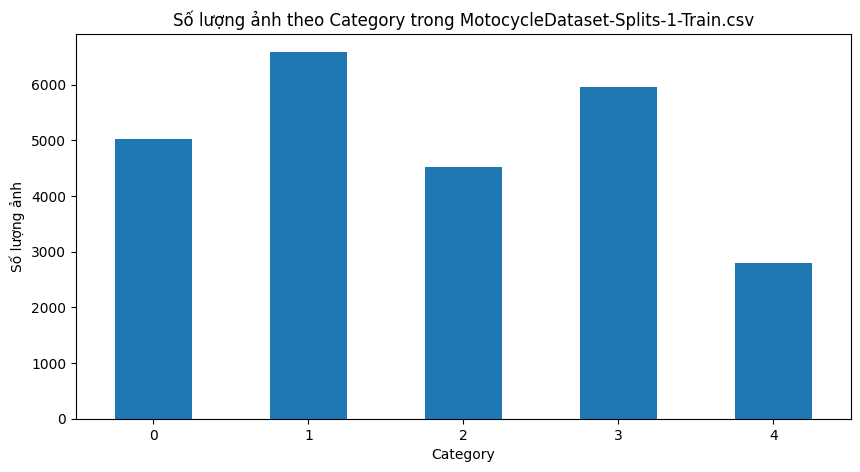

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-1-Test.csv:
Category
0    1257
1    1646
2    1129
3    1491
4     700
Name: count, dtype: int64
------------------------------


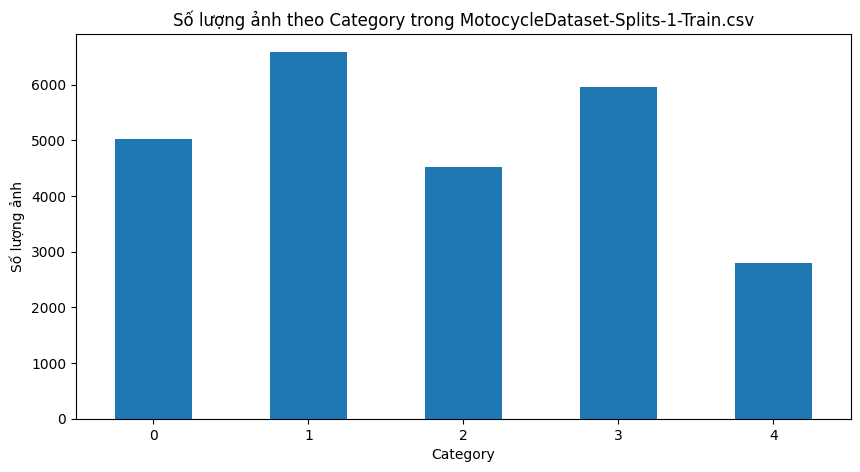

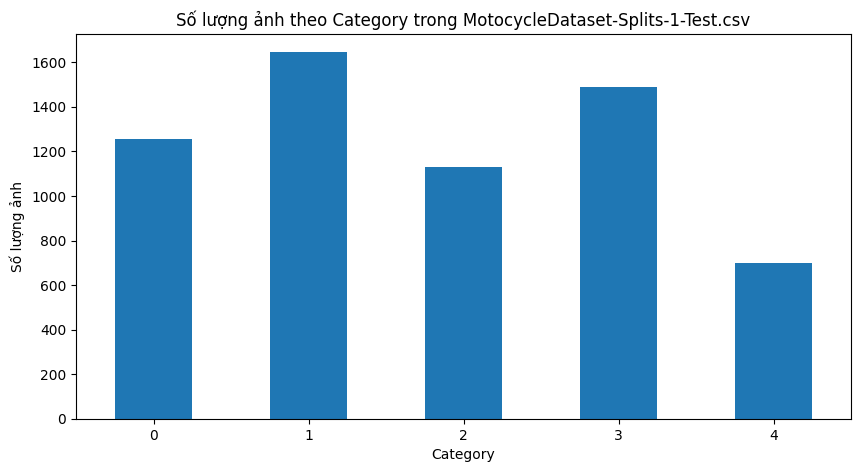

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-2-Train.csv:
Category
0    5026
1    6584
2    4513
3    5964
4    2802
Name: count, dtype: int64
------------------------------


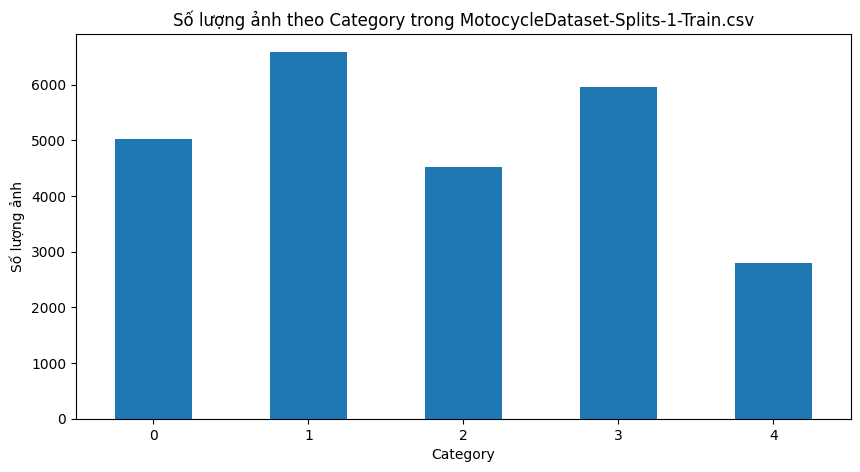

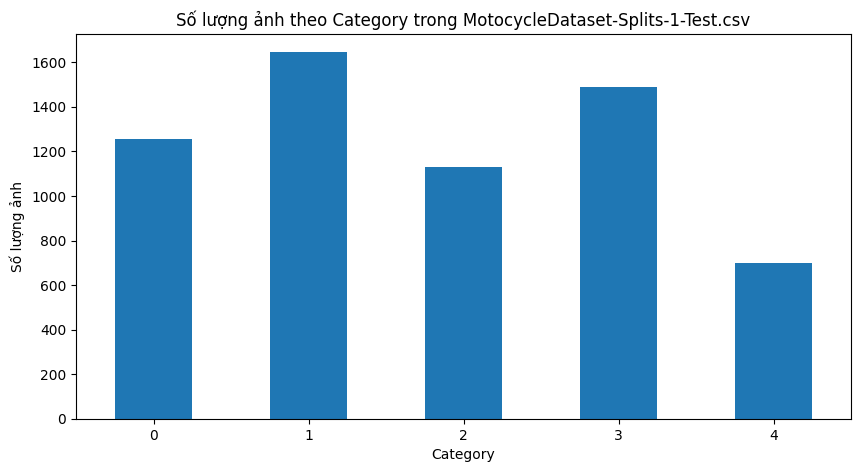

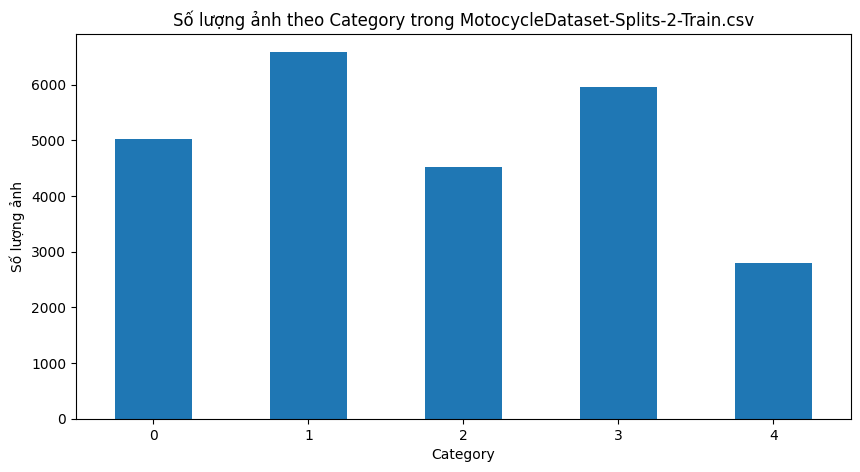

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-2-Test.csv:
Category
0    1257
1    1646
2    1128
3    1492
4     700
Name: count, dtype: int64
------------------------------


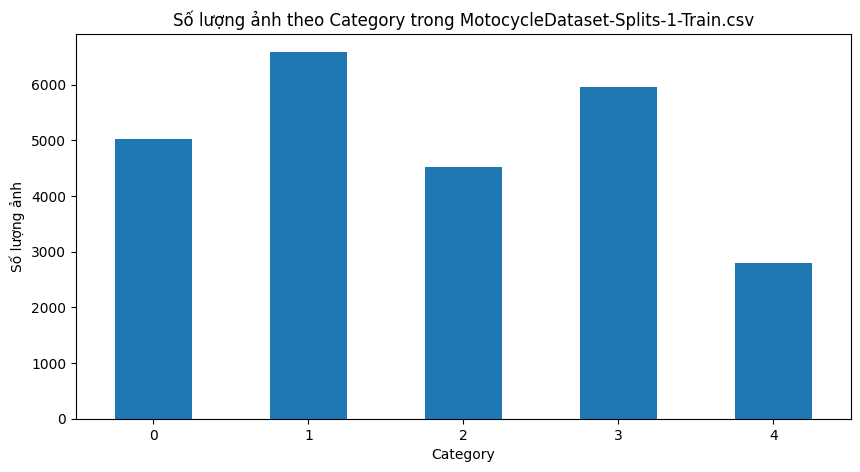

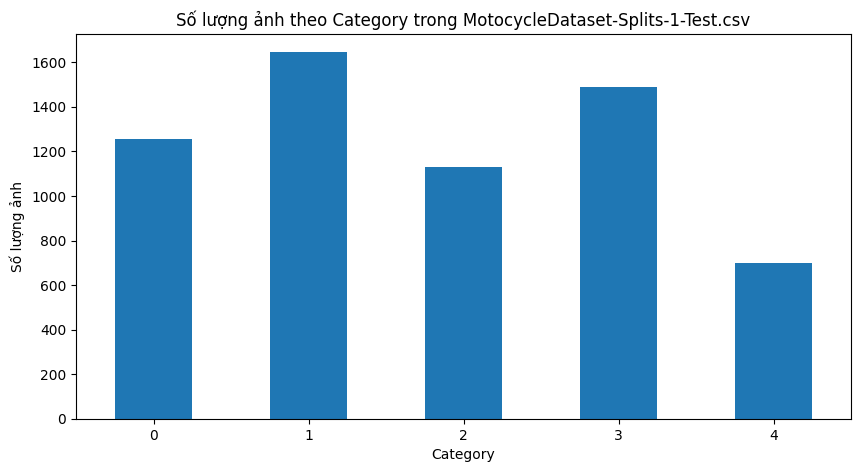

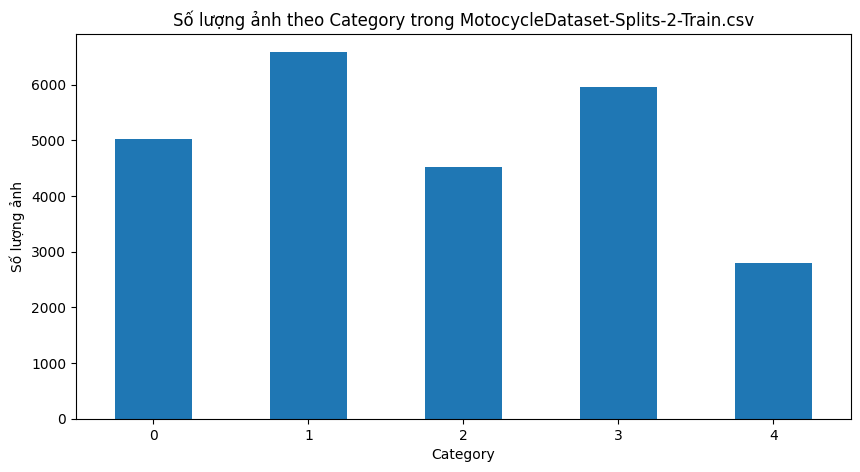

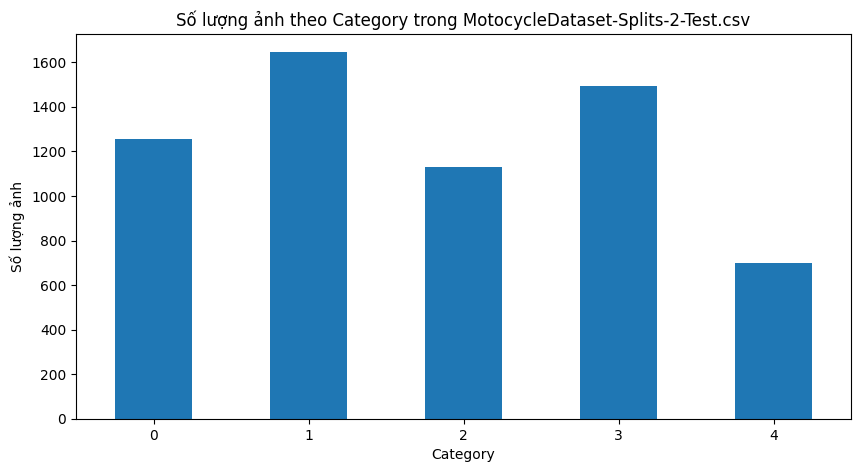

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-3-Train.csv:
Category
0    5027
1    6584
2    4513
3    5965
4    2801
Name: count, dtype: int64
------------------------------


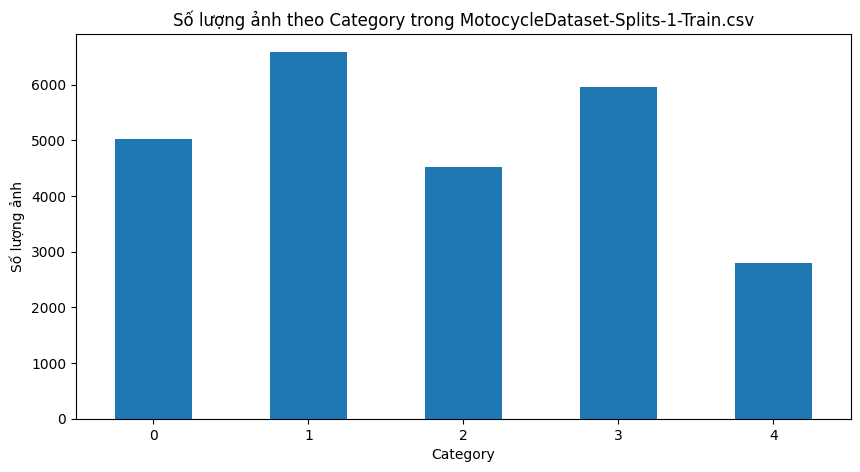

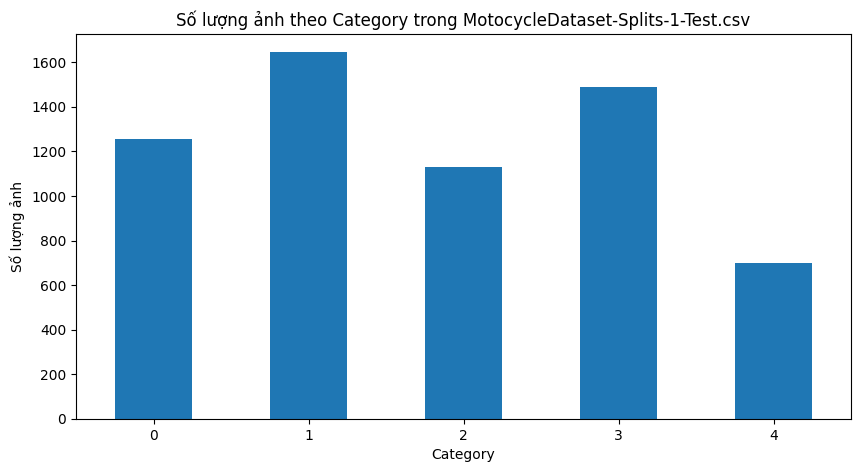

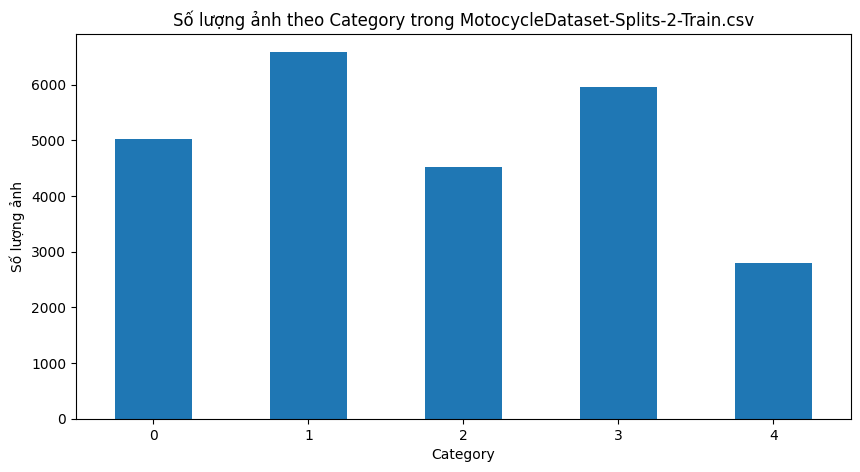

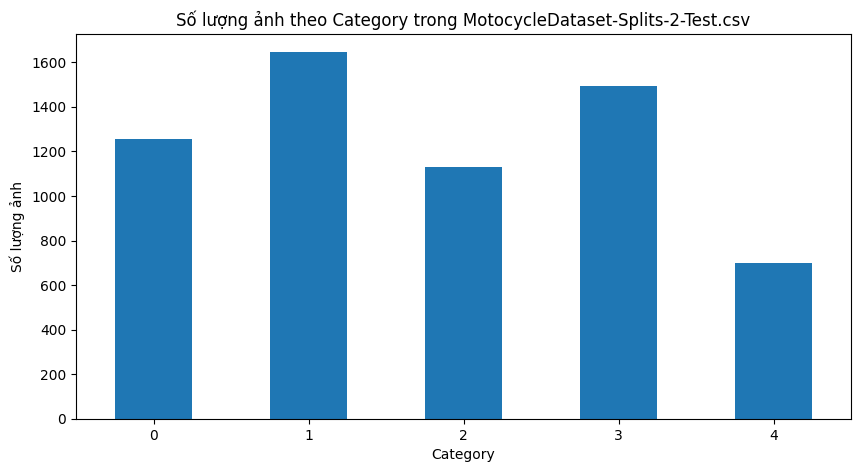

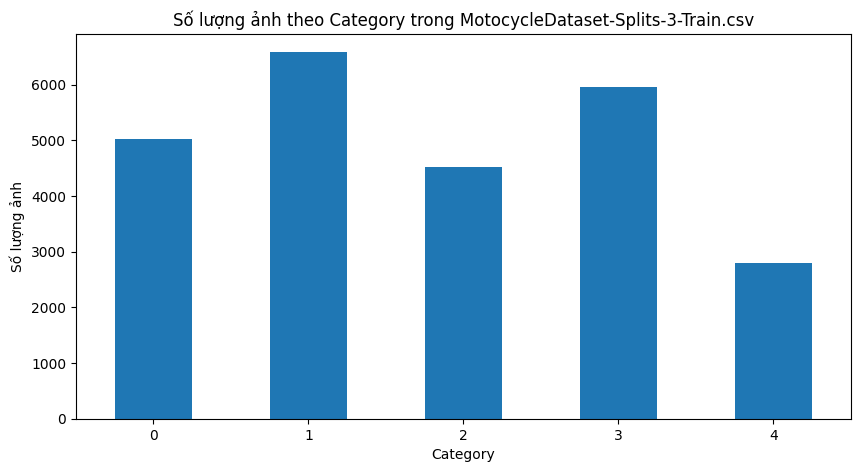

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-3-Test.csv:
Category
0    1256
1    1646
2    1128
3    1491
4     701
Name: count, dtype: int64
------------------------------


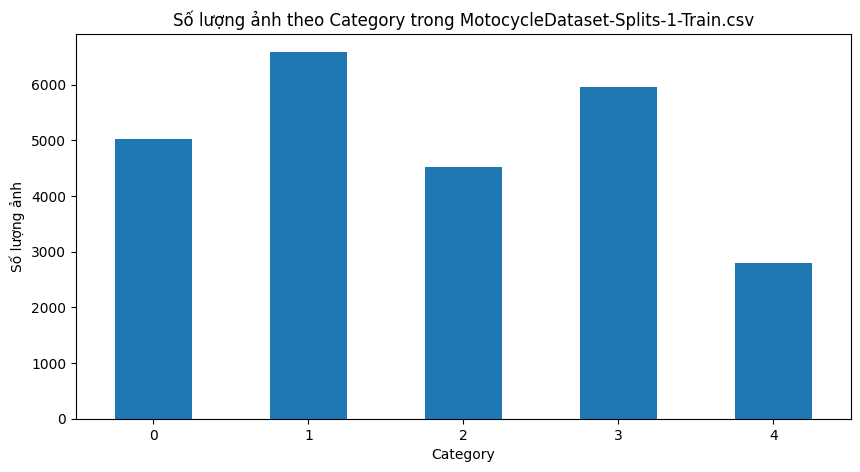

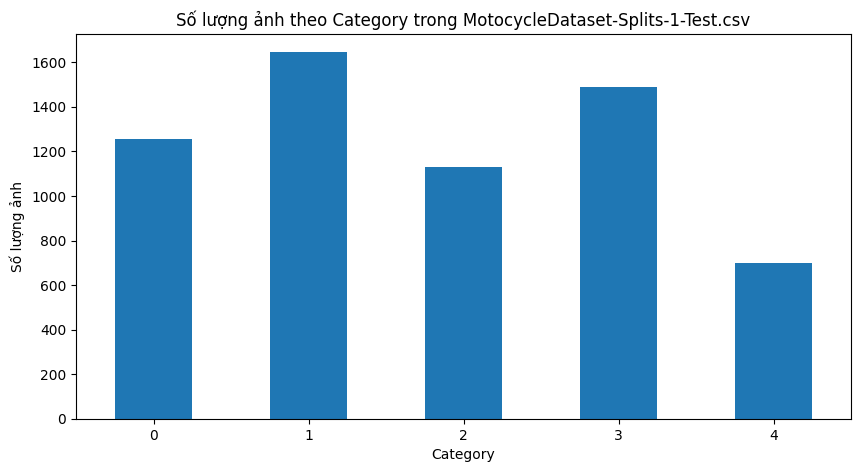

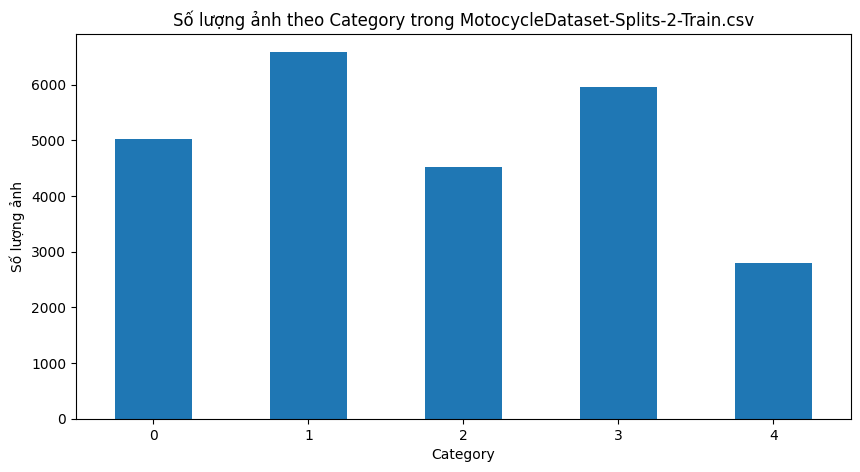

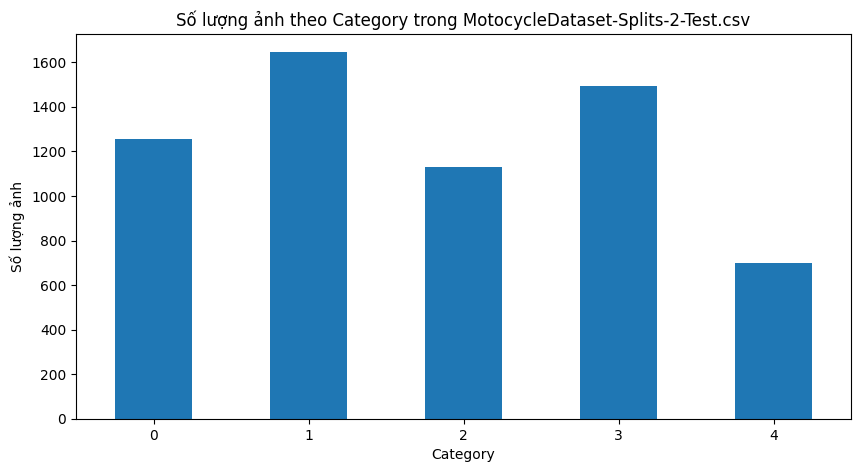

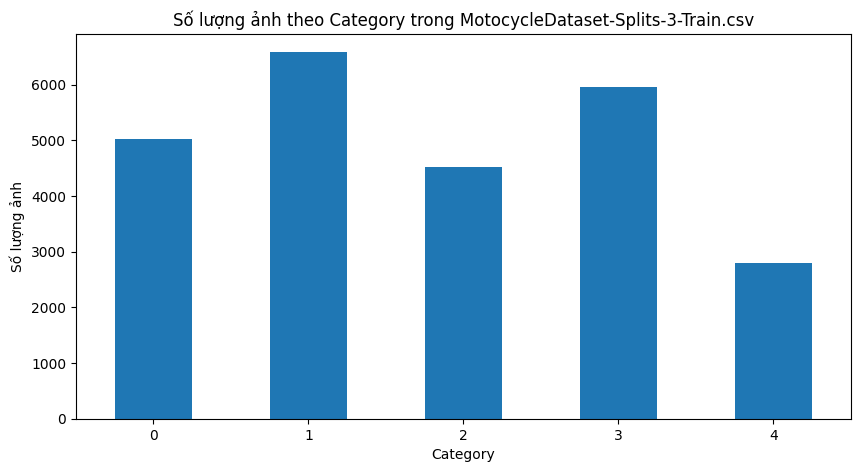

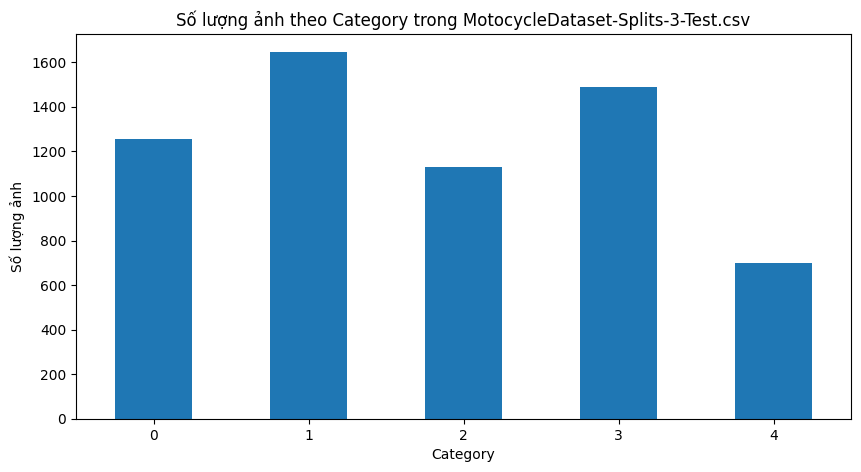

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-4-Train.csv:
Category
0    5027
1    6584
2    4513
3    5965
4    2801
Name: count, dtype: int64
------------------------------


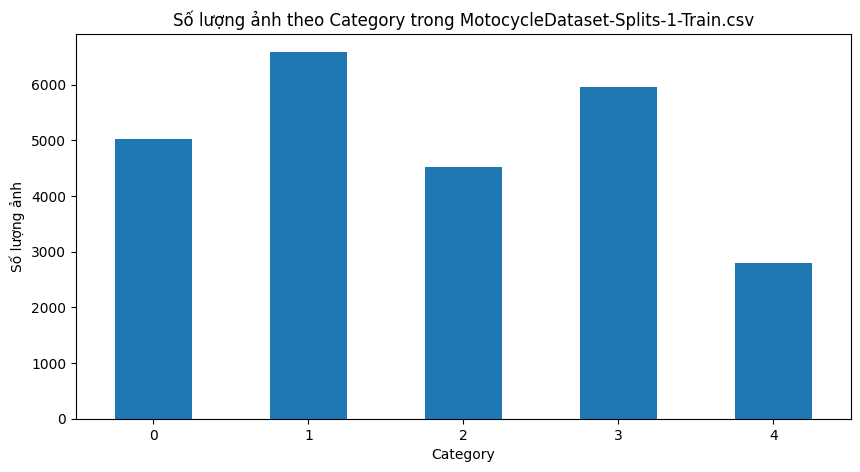

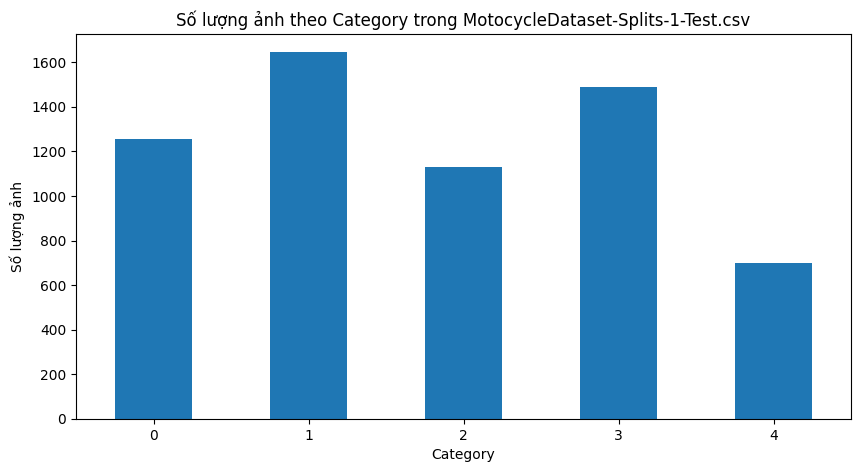

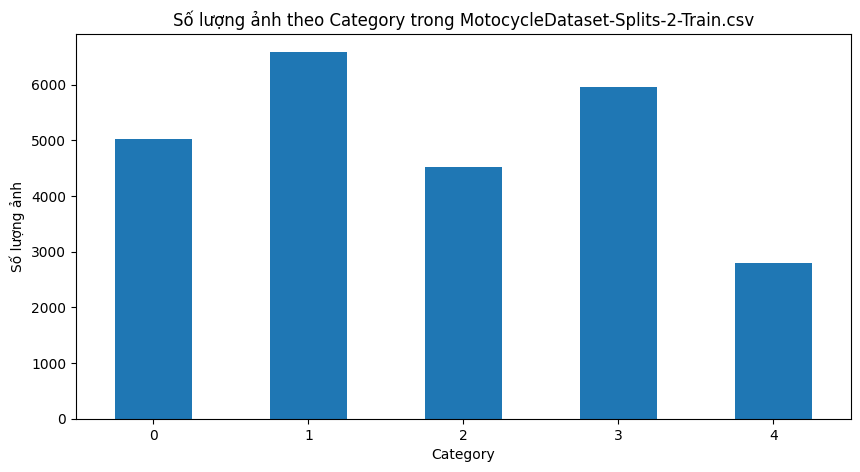

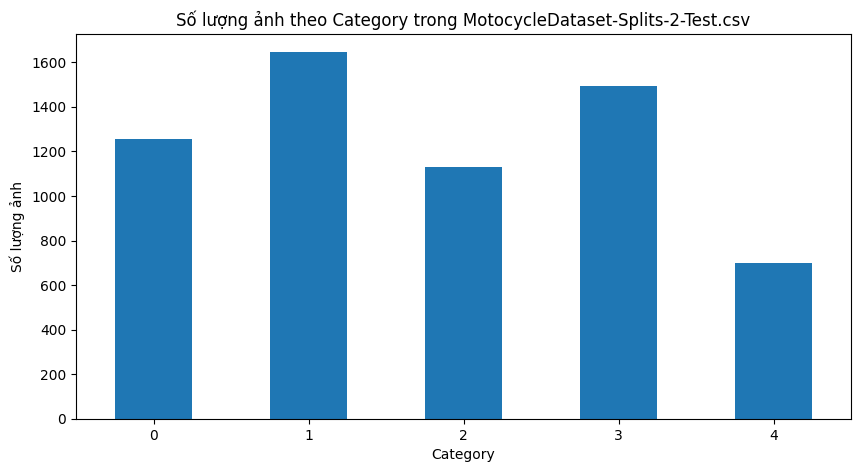

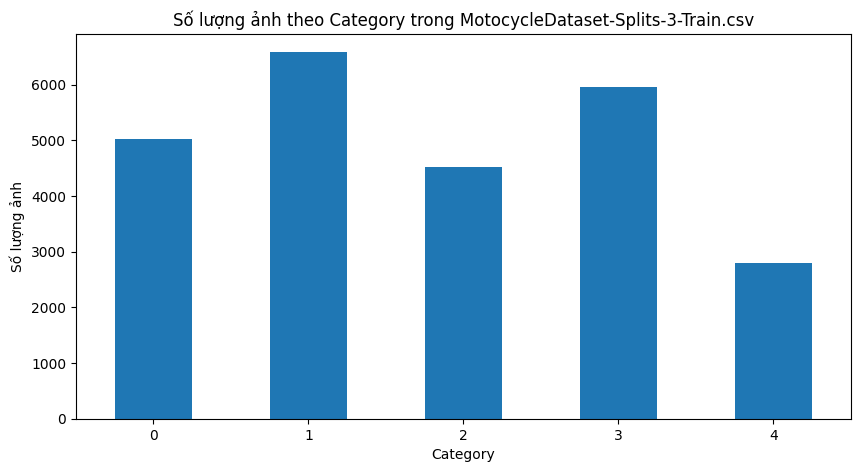

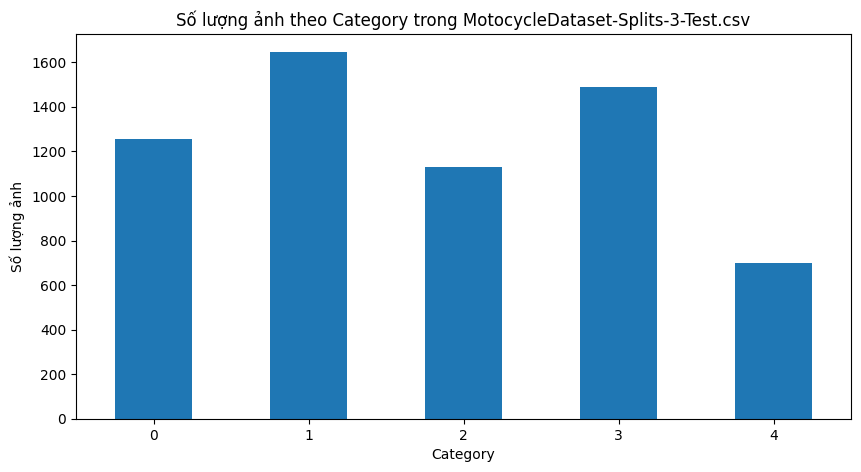

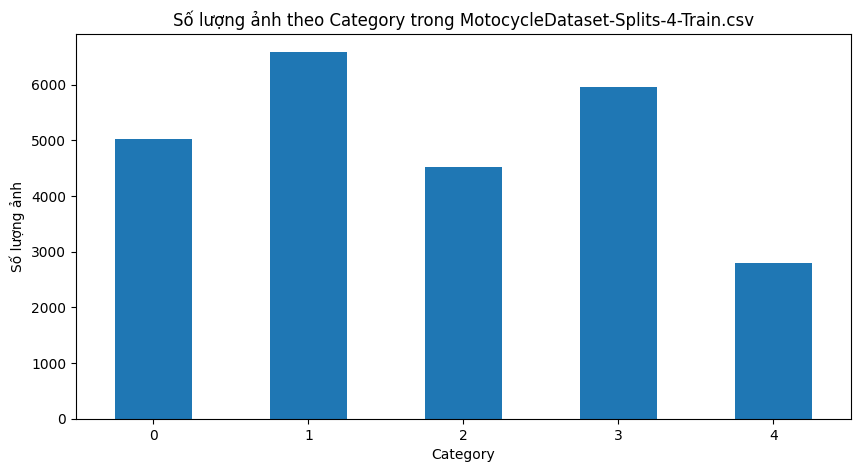

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-4-Test.csv:
Category
0    1256
1    1646
2    1128
3    1491
4     701
Name: count, dtype: int64
------------------------------


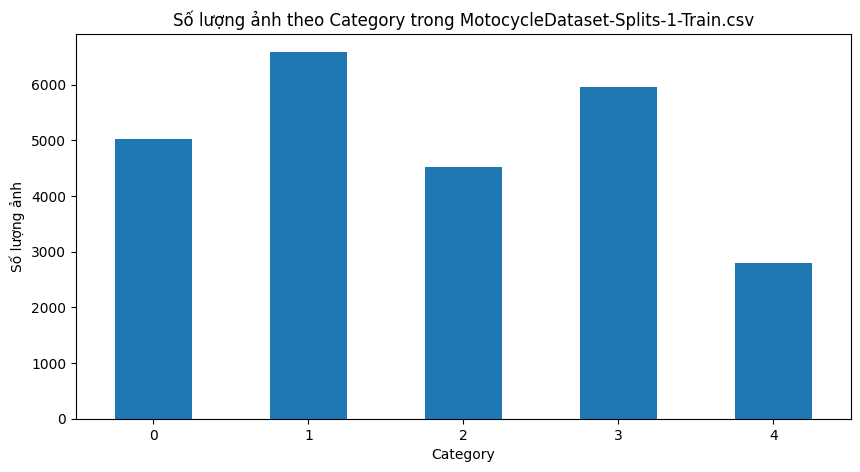

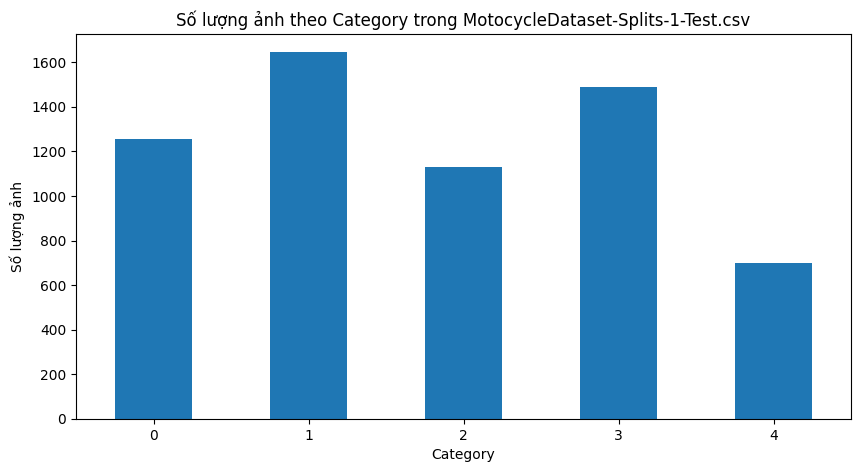

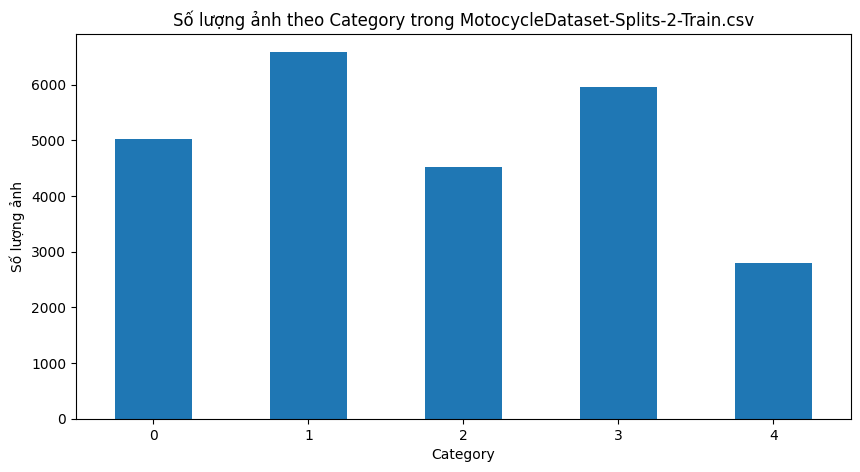

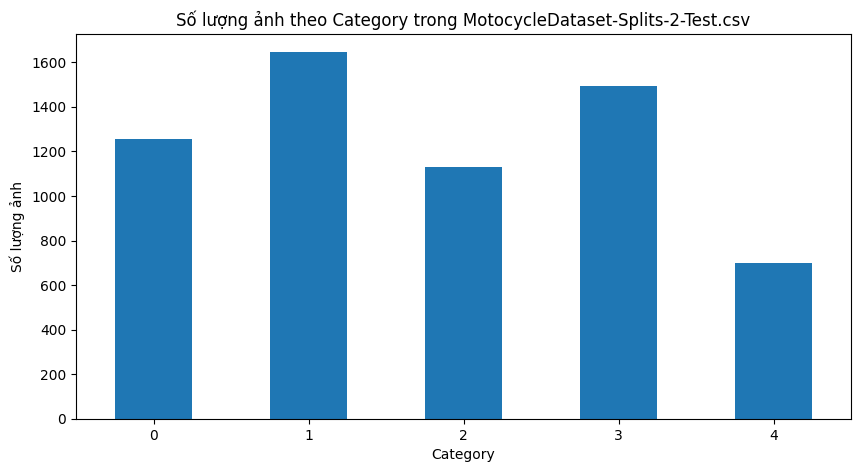

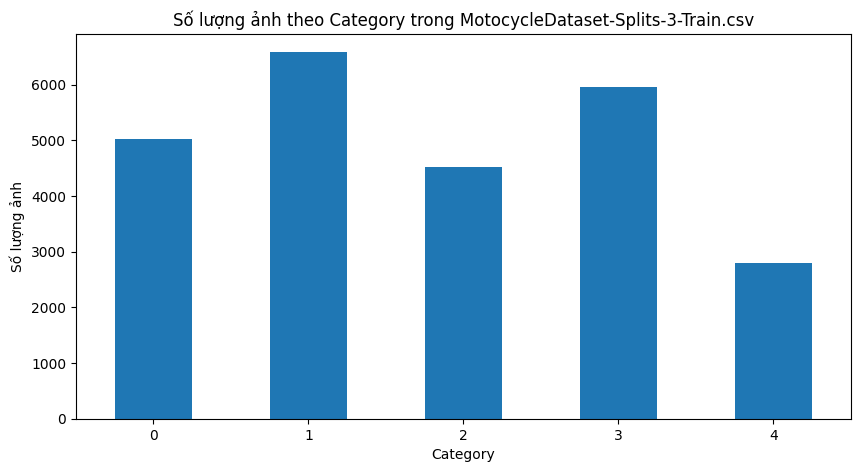

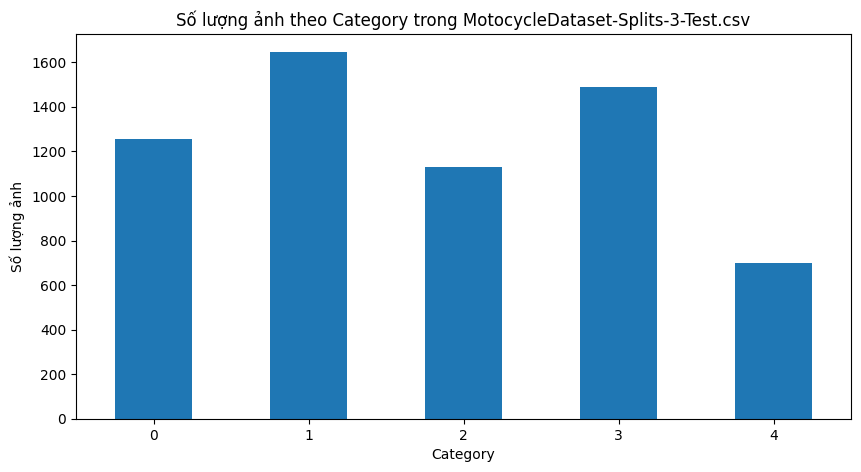

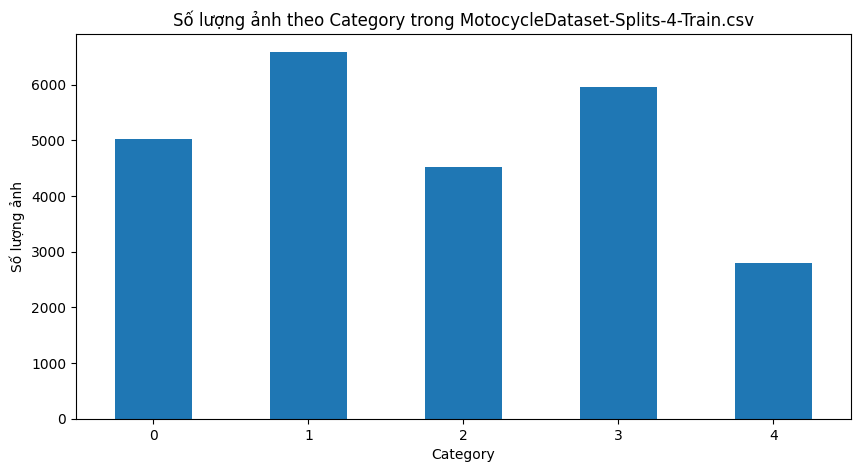

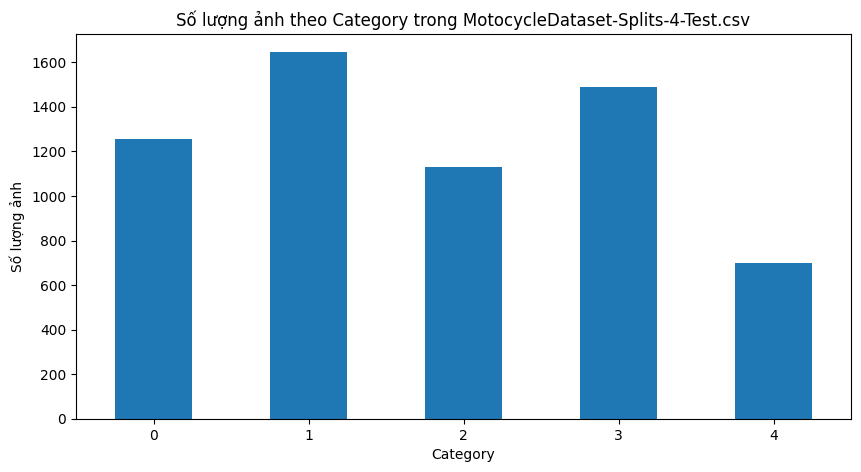

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-5-Train.csv:
Category
0    5026
1    6584
2    4513
3    5965
4    2802
Name: count, dtype: int64
------------------------------


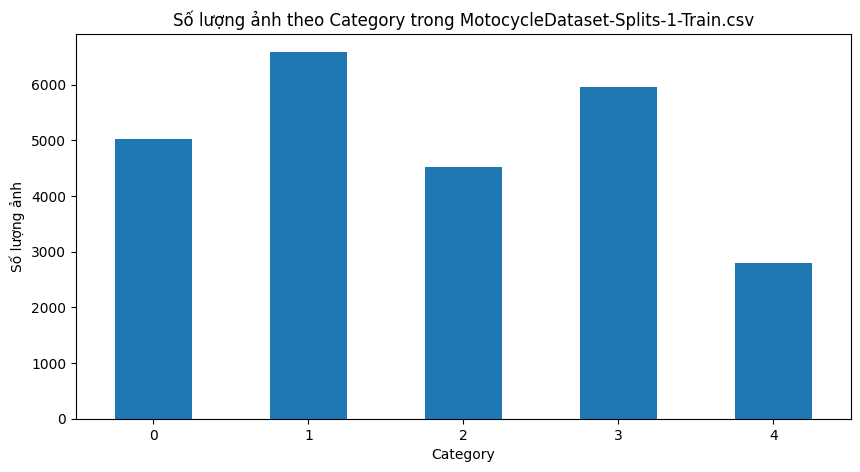

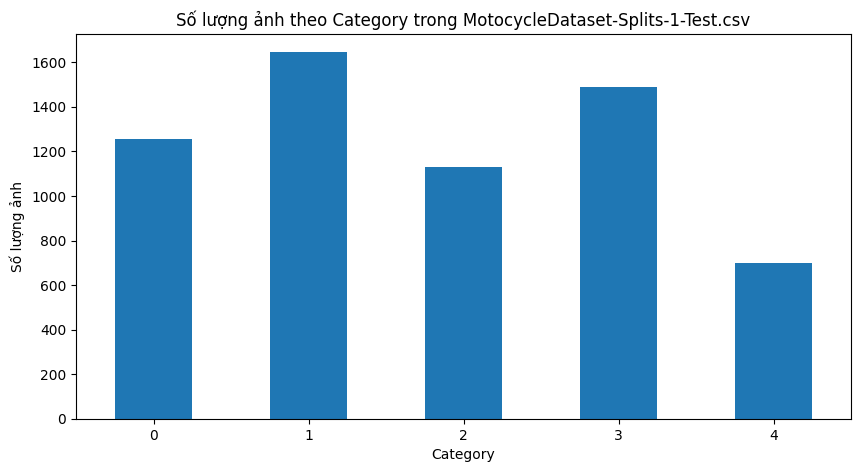

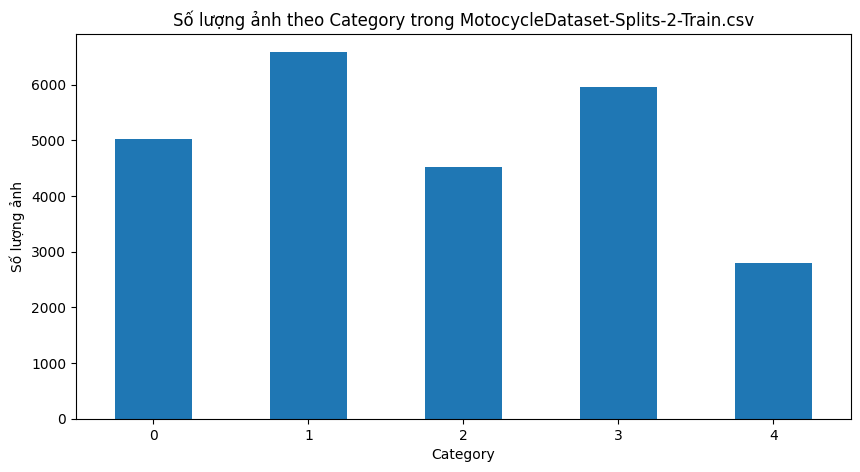

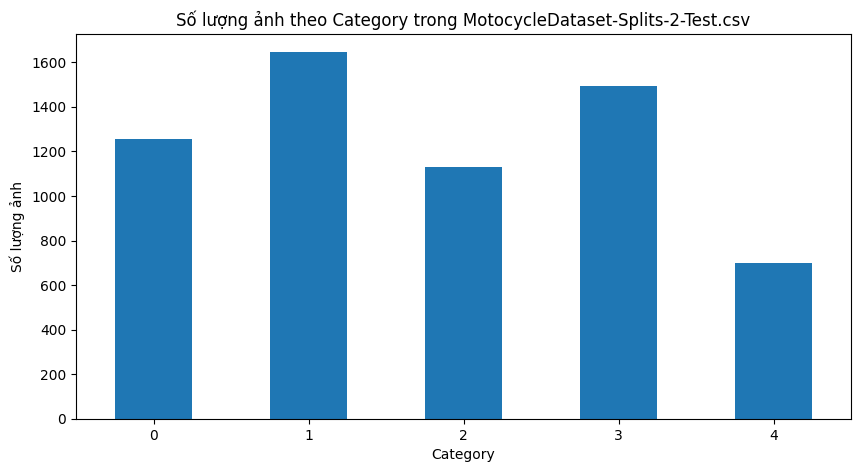

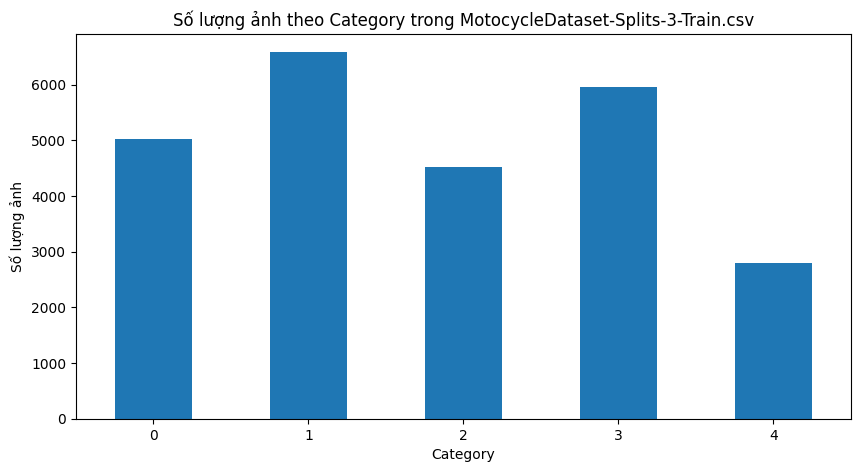

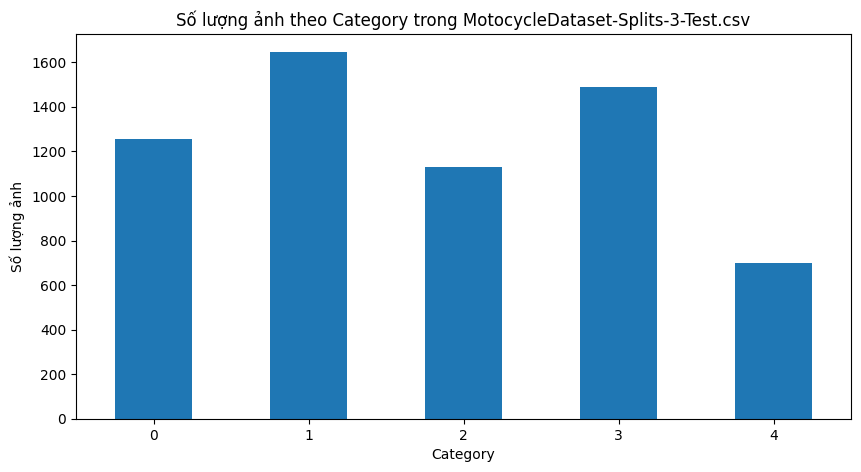

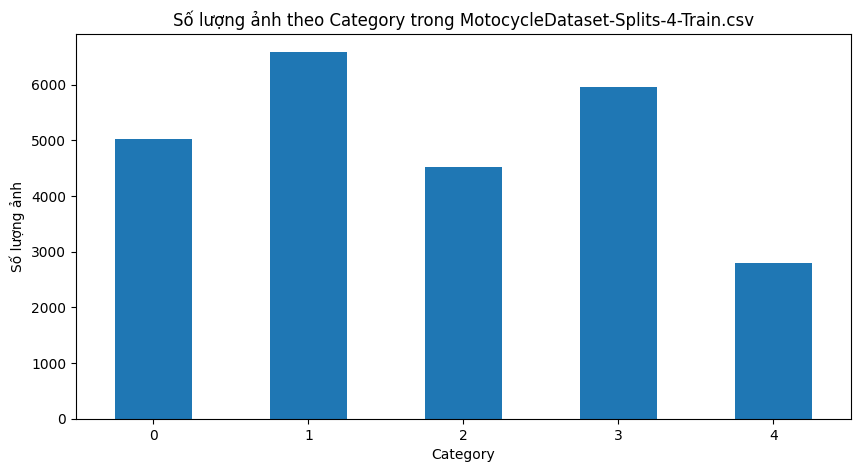

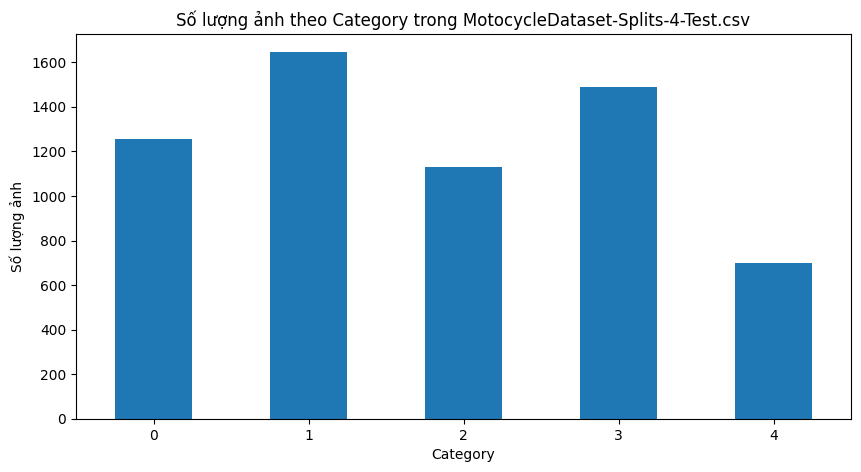

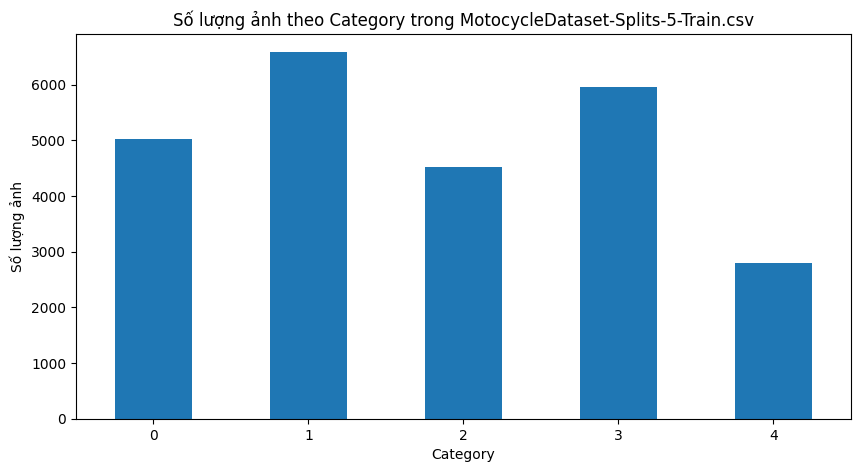

Thống kê cho file /content/drive/MyDrive/MotorcycleDatasetSplits/MotocycleDataset-Splits-5-Test.csv:
Category
0    1257
1    1646
2    1128
3    1491
4     700
Name: count, dtype: int64
------------------------------


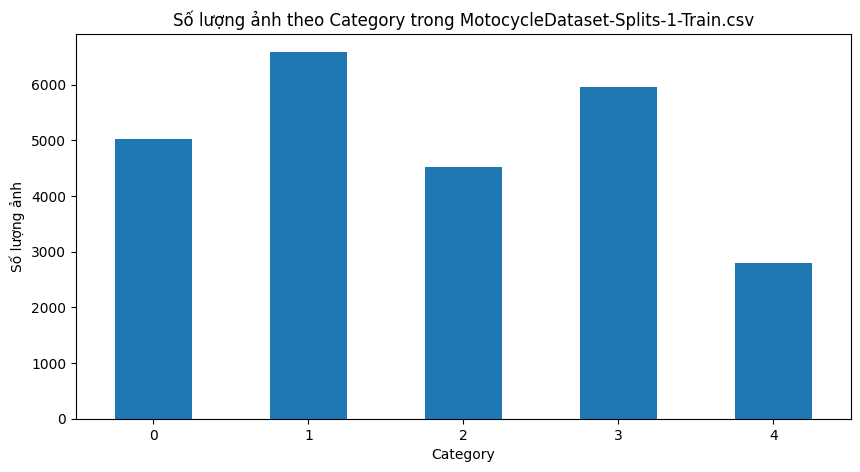

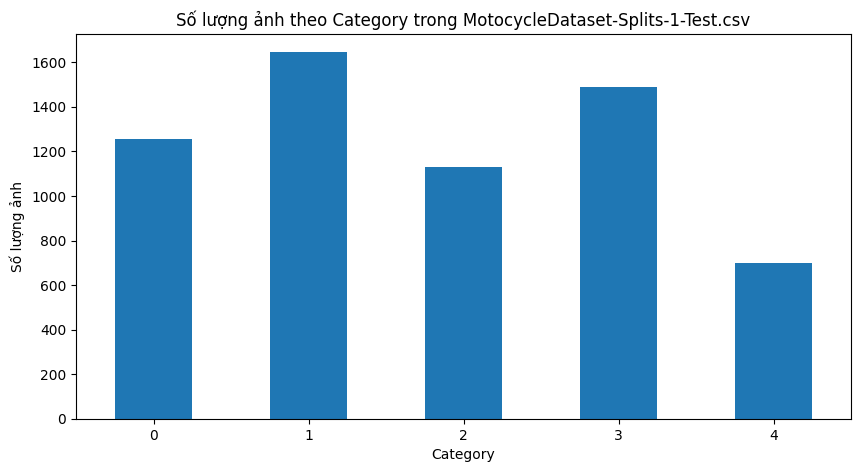

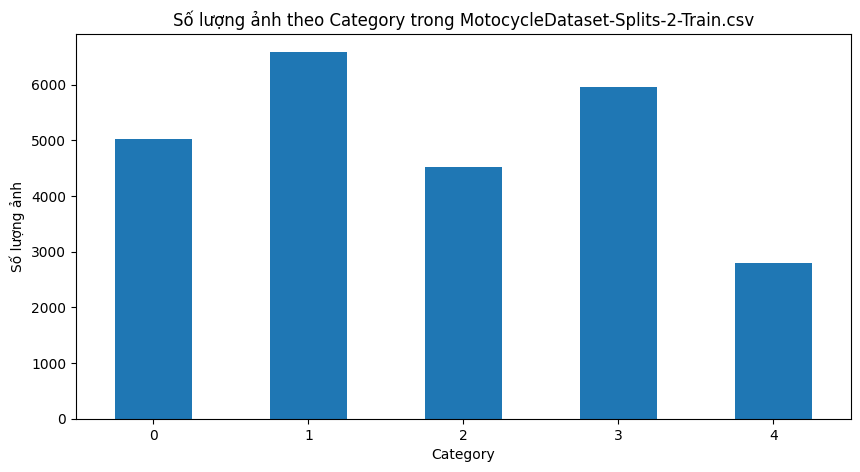

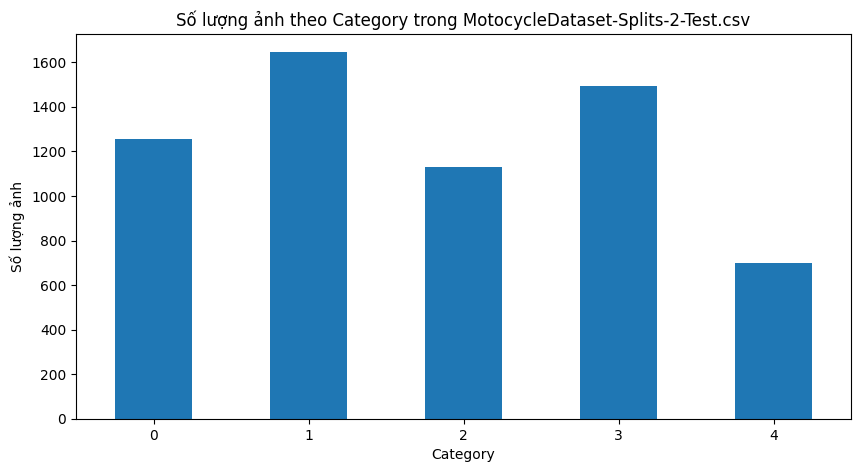

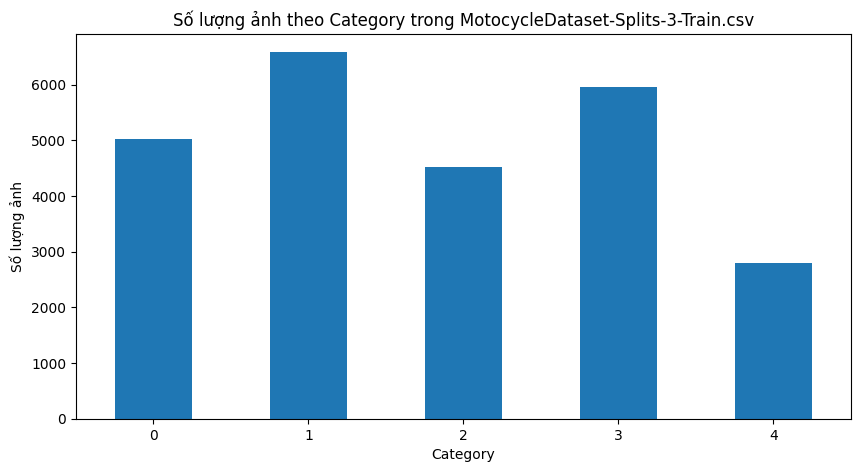

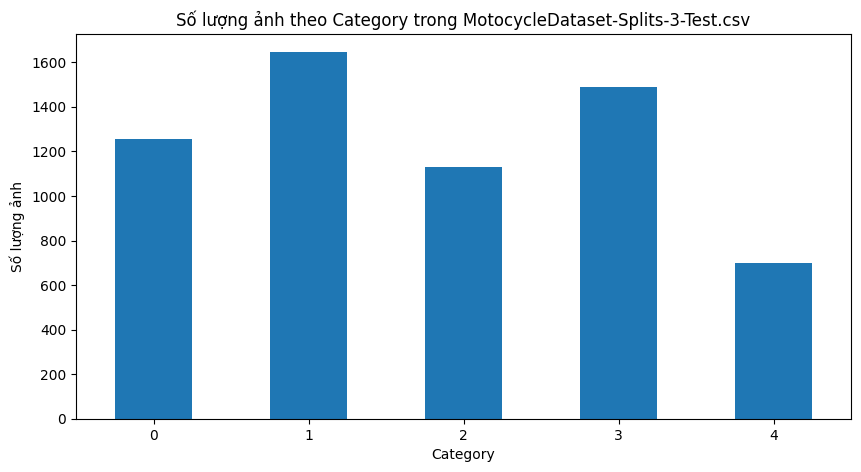

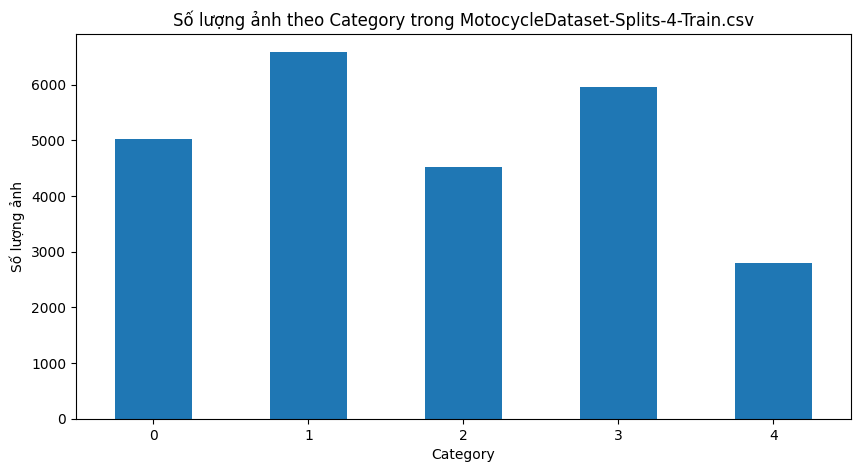

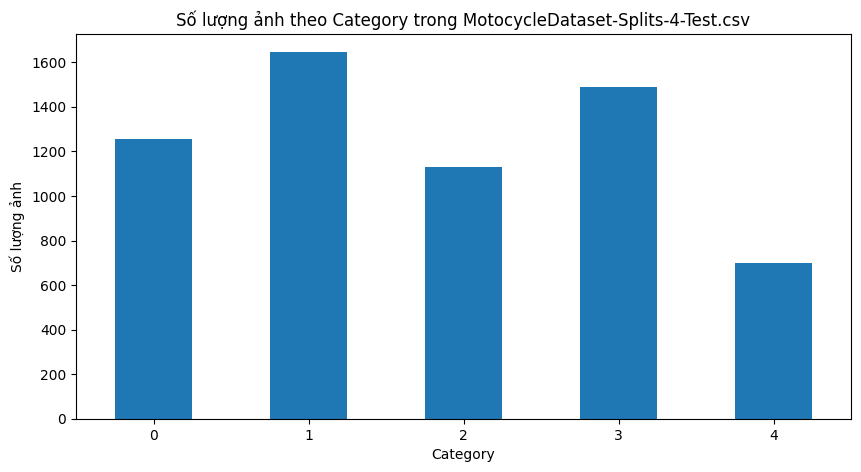

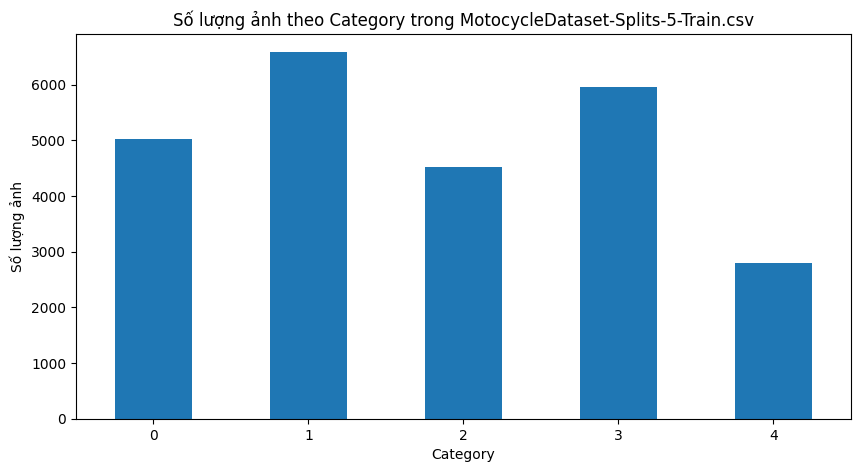

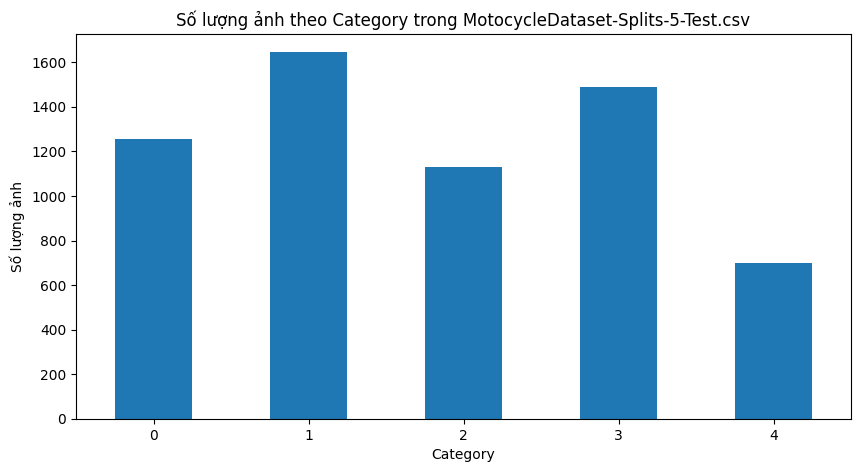

In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục 'MyDataset'
folder_path = '/content/drive/MyDrive/MotorcycleDatasetSplits'

# Tìm tất cả các file CSV trong thư mục 'MyDataset'
csv_files = glob.glob(f'{folder_path}/*.csv')
category_statistics = {}

# Duyệt qua từng file CSV và thống kê số lượng ảnh
for csv_file in csv_files:
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(csv_file)

    # Thống kê số lượng ảnh theo category
    category_counts = df['Category'].value_counts().sort_index()

    # In ra kết quả thống kê
    print(f'Thống kê cho file {csv_file}:')
    print(category_counts)
    print('-' * 30)
    category_statistics[os.path.basename(csv_file)] = category_counts

# Vẽ biểu đồ
    for filename, counts in category_statistics.items():
      plt.figure(figsize=(10, 5))
      counts.plot(kind='bar')
      plt.title(f'Số lượng ảnh theo Category trong {filename}')
      plt.xlabel('Category')
      plt.ylabel('Số lượng ảnh')
      plt.xticks(rotation=0)
      plt.show()
